In [1]:
import pandas as pd

In [2]:
# read csv file
filename = "Project_1_dataset_01_01_2022.csv"
df = pd.read_csv(filename)

In [3]:
# check the data
df.head()

,Unnamed: 0,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,590,Having made a massive impact in Saudi Arabia w...,Having made a massive impact in Saudi Arabia w...,"['singhs', 'rooting', 'cool', 'saudi', 'style'...",NaN,[],https://www.msn.com/en-in/entertainment/other/...,cricket,sports
1,388,Cricket is all about the emotional rollercoast...,"No matter which team fans hope to win, every s...","['wants', 'fans', 'finals', 'cup', 'win', 'tou...",NaN,[],https://www.prnewswire.com:443/news-releases/c...,cricket,sports
2,423,New Zealand announces back-to-back tours next ...,New Zealand announces back-to-back tours next ...,"['test', 'west', 'tour', 'zealand', 'world', '...",2021-12-20 00:00:00,[],https://www.aljazeera.com/news/2021/12/20/cric...,cricket,sports
3,563,It's not the first time cricket fans in the co...,Billed as one of the pre-tournament favourites...,"['qualify', 'afghanistan', 'cup', 'world', 'ze...",NaN,[],https://www.msn.com/en-in/news/other/t20-world...,cricket,sports
4,634,An employee works on a computer terminal again...,"REUTERS/Sivaram VBENGALURU, Oct 11 (Reuters Br...","['success', 'tech', 'startup', 'talent', 'onli...",2021-10-11 00:00:00,['Una Galani'],https://www.reuters.com/breakingviews/india-in...,cricket,sports


## Question1

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
class question1:
    def __init__(self):
        pass
    def overview(self,df):
        shape = df.shape
        samples,features = shape[0],shape[1]
        return samples,features
    
    def histogram_a(self,df):
        r,c = self.overview(df)
        ft = df['full_text']
        
        count = []
        for i in range(r):
            count.append(len(ft[i]))
        
        plt.figure()
        plt.hist(count,50)
        plt.xlabel('count')
        plt.ylabel('frequency')
        plt.show()
        
    def histogram_bc(self,df,col_name):
        df_class = df[col_name]
        df_set = set(df_class)
        class_dict = {}
        for key in df[col_name]:
            class_dict[key] = class_dict.get(key,0)+1
        
        plt.figure(figsize=(12,4))
        plt.bar(class_dict.keys(),class_dict.values(),0.5)
        plt.xlabel('class')
        plt.ylabel('frequency')
        plt.show()
q1 = question1()    

In [5]:
# overview
samples,features = q1.overview(df)
print("sample number:{}".format(samples))
print("features number:{}".format(features))

sample number:2072
features number:9


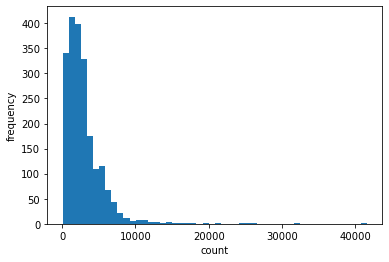

In [6]:
# histogram (a)
q1.histogram_a(df)

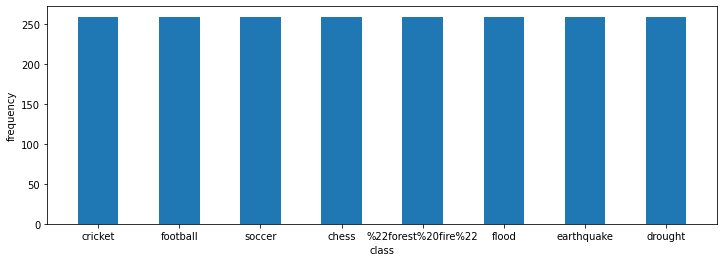

In [7]:
# histogram (b)
q1.histogram_bc(df,'leaf_label')

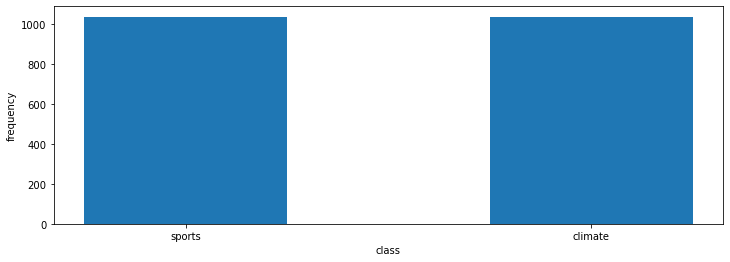

In [8]:
# histogram (c)
q1.histogram_bc(df,'root_label')

## Question2

In [9]:
import numpy as np
import random 

np.random.seed(42)
random.seed(42)

In [10]:
from sklearn.model_selection import train_test_split

def question2(train,test):
    
    train_num = train.shape[0]
    test_num = test.shape[0]
    return train_num,test_num

train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

train_num,test_num = question2(train,test)
print("train number:{}".format(train_num))
print("test number:{}".format(test_num))

train number:1657
test number:415


## Question3

In [11]:
from sklearn.feature_extraction import text
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

def clean_data(data):
    for index,row in data.iterrows():
        row['full_text'] = clean(row['full_text'])
    return data

In [12]:
# clean the data 
train_clean = clean_data(train)
test_clean = clean_data(test)

In [13]:
# import necessary libraries
import nltk

## Uncomment all and download and comment it back 
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords' )
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [14]:
# import necessary libraries
from nltk import pos_tag
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# Lemmatization

stop_words_en = stopwords.words('english')
stop_words_skt = text.ENGLISH_STOP_WORDS
print("# of stop_words_en:\t\t %s" % len(stop_words_en))
print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
print("# of punctuation:\t\t %s" % len(punctuation))
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
wnl = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def stem_rmv_punc(doc): # this should have been at the sentence-level because the pos-tag performs best at sentence-level
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

count_vect = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, analyzer=stem_rmv_punc)

# of stop_words_en:		 179
# of stop_words_skt:		 318
# of punctuation:		 32


In [16]:
X_train_counts = count_vect.fit_transform(train.full_text)
print(X_train_counts.shape)

X_test_counts = count_vect.transform(test.full_text)
print(X_test_counts.shape)

(1657, 10130)
(415, 10130)


In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(1657, 10130)
(415, 10130)


#### Pros and Cons

the advantages of stemming are that it’s straightforward to implement and fast to run.

lemmatization provides better results by performing an analysis that depends on the word’s part-of-speech and producing real, dictionary words. 

However, if we are heavily optimizing for speed, a simpler stemming algorithm can be a possibility.

## Question 4

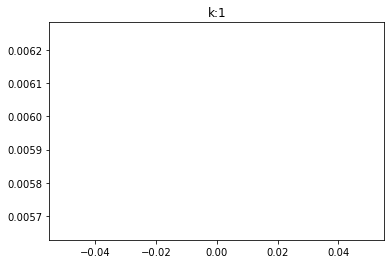

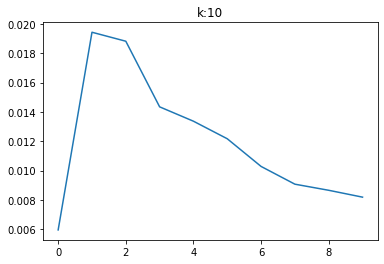

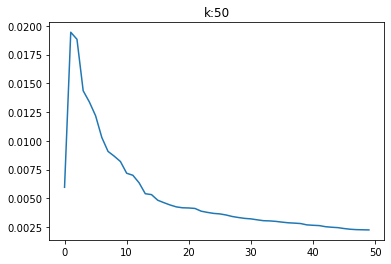

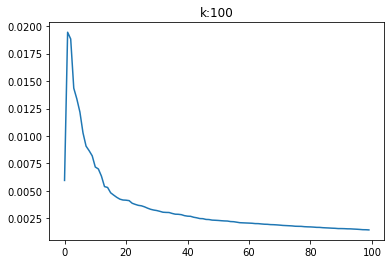

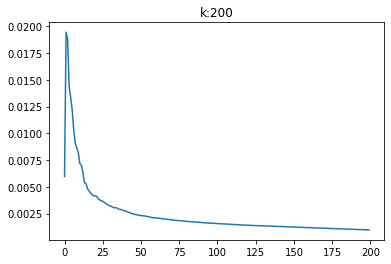

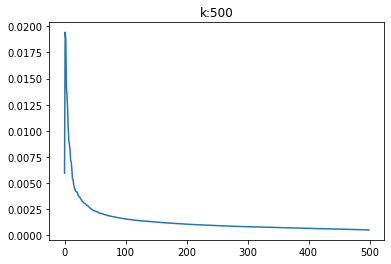

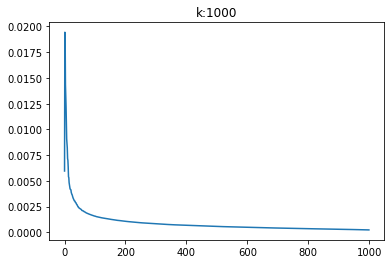

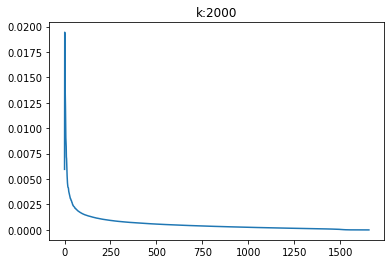

In [18]:
from sklearn.decomposition import TruncatedSVD
# The explained variance ratio plot
k = [1, 10, 50, 100, 200, 500, 1000, 2000]
for i in range(len(k)):
    SVD = TruncatedSVD(n_components=k[i], random_state=0)
    SVD.fit_transform(X_train_tfidf)
    fig = plt.plot(SVD.explained_variance_ratio_)
    plt.title("k:{}".format(k[i]))
    plt.show()

The explained variance ration:

This is an array of the variance of the data explained by each of the {k} principal components. This plot tells us that the biggest data variance lands on between 5-10 PC, which is where the peak is. 


In [21]:
## For LSI

SVD_50 = TruncatedSVD(n_components=50, random_state=0)
X_train_lsi = SVD_50.fit_transform(X_train_tfidf)
X_test_lsi = SVD_50.transform(X_test_tfidf)
print(X_train_tfidf.shape)
print(X_train_lsi.shape)
# print(SVD_50.explained_variance_ratio_)
# print(SVD_50.explained_variance_ratio_.cumsum())
print(X_test_tfidf.shape)
print(X_test_lsi.shape)

(1657, 10130)
(1657, 50)
(415, 10130)
(415, 50)


In [22]:
## For NMF
from sklearn.decomposition import NMF

NMF_50 = NMF(n_components=50, init='random', random_state=0)
X_train_nmf = NMF_50.fit_transform(X_train_tfidf)
print(X_train_tfidf.shape)
print(X_train_nmf.shape)

X_test_nmf = NMF_50.transform(X_test_tfidf)
print(X_test_tfidf.shape)
print(X_test_nmf.shape)

(1657, 10130)
(1657, 50)
(415, 10130)
(415, 50)


In [23]:
import numpy as np
## Loss of LSI
Sigma_V = SVD_50.components_
error_lsi = np.sum(np.array(X_train_tfidf - X_train_lsi.dot(Sigma_V)) ** 2)
print(error_lsi)

1179.9461432115684


In [24]:
## Loss of NMF
H = NMF_50.components_
error_nmf = np.sum(np.array(X_train_tfidf - X_train_nmf.dot(H)) ** 2)
print(error_nmf)

1200.5605264906985


In [25]:
if error_lsi > error_nmf:
    print("The loss of LSI is larger!")
else: 
    print("The loss of NMF is larger!")

The loss of NMF is larger!


Why?

Both NMF and SVD represent a set of vectors in a given basis. The basis in NMF is composed of vectors with positive elements while the basis in SVD can have positive or negative values.

The difference then is that NMF reconstructs each vector as a positive summation of the basis vectors, in other words you take a little of each vector in the basis to reconstruct your data.

In SVD the data is modeled as a linear combination of the basis you can add or substract vectors as needed.

## Question 5

In [26]:
# root_label -> vector
# sport -> 0
# climate -> 1

def new_label(data):
    new_label = []
    data_class = list(set(data['root_label'])) #    ['sports', 'climate']
    
    for i,row in data.iterrows():
        if row['root_label'] == data_class[0]:
            new_label.append(0)
        elif row['root_label'] == data_class[1]:
            new_label.append(1)
        else:
            print('wrong label')
    return new_label

train_label = new_label(train)
test_label = new_label(test)
# check 
print("train label number:{}".format(len(train_label)))
print("test label number:{}".format(len(test_label)))

train label number:1657
test label number:415


In [27]:
# check label
print(train['root_label'].head())
print(train_label[0:5])
print(test['root_label'].head())
print(test_label[0:5])

1431    climate
1567    climate
1044    climate
175      sports
1610    climate
Name: root_label, dtype: object
[0, 0, 0, 1, 0]
1351    climate
733      sports
678      sports
1460    climate
411      sports
Name: root_label, dtype: object
[0, 1, 1, 0, 1]


### Train SVM model

In [28]:
# train linear SVM

from sklearn.svm import SVC

svm_hard = SVC(kernel='linear', C=1000, random_state=42)
svm_soft = SVC(kernel='linear', C=0.0001, random_state=42)

svm_hard.fit(X_train_lsi, train_label)
svm_soft.fit(X_train_lsi, train_label)

SVC(C=0.0001, kernel='linear', random_state=42)

#### Receiver Operating Characteristic (ROC)

Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

In [29]:
# plot ROC
from sklearn import metrics

def plot_ROC(fpr,tpr):
    fig = plt.figure()
    roc_auc = metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,label="area under curve = %0.3f" %roc_auc)
    plt.xlabel('False positive rate',fontsize=10)
    plt.ylabel('True positive rate',fontsize=10)
    plt.grid()
    plt.legend()
    return roc_auc
    

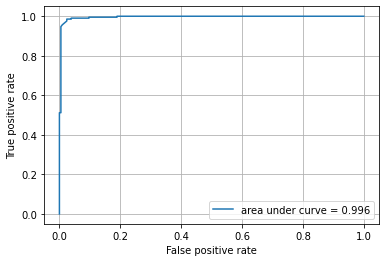

In [30]:
# plot ROC curve for svm_hard
score_hard = svm_hard.decision_function(X_test_lsi)
fpr_hard,tpr_hard,_ = metrics.roc_curve(test_label,score_hard)
auc_hard = plot_ROC(fpr_hard,tpr_hard)

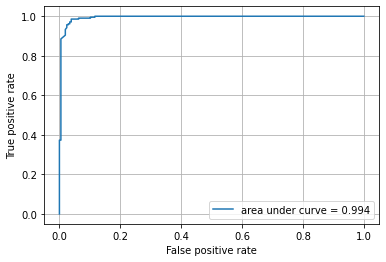

In [31]:
# plot ROC curve for svm_hard
score_soft = svm_soft.decision_function(X_test_lsi)
fpr_soft,tpr_soft,_ = metrics.roc_curve(test_label,score_soft)
auc_soft = plot_ROC(fpr_soft,tpr_soft)

In [32]:
# comparison
if auc_hard > auc_soft:
    print('SVM_hard is better')
else:
    print('SVM_soft is better')

SVM_hard is better


In [33]:
# Evaluation

def evaluation(classifier,test_data,test_label):
    test_pre = classifier.predict(test_data)
    confusion_m = metrics.confusion_matrix(test_label,test_pre)
    print("Confusion matrix:")
    print('_' * 20)
    print(confusion_m)
    print('_' * 20)
    print(metrics.classification_report(test_label,test_pre))
    

In [34]:
print("Performance of SVM hard")
print('_' * 40)
evaluation(svm_hard,X_test_lsi,test_label)
print('_' * 60)
print("Performance of SVM soft")
print('_' * 40)
evaluation(svm_soft,X_test_lsi,test_label)

Performance of SVM hard
________________________________________
Confusion matrix:
____________________
[[198   8]
 [  3 206]]
____________________
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       206
           1       0.96      0.99      0.97       209

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415

____________________________________________________________
Performance of SVM soft
________________________________________
Confusion matrix:
____________________
[[206   0]
 [209   0]]
____________________
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       206
           1       0.00      0.00      0.00       209

    accuracy                           0.50       415
   macro avg       0.25      0.50      0.33       415
weighted avg       0.25      0.50      0.33 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Use cross-validation to choose $\gamma$

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def cross_validate(classifier, train, label):
    avg_score = []

    for k in range(-3, 6):
        classifier.set_params(C=10**k).fit(train, label)
        cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
        scores = cross_val_score(classifier, train, label, cv=cv, scoring='accuracy')
    
        print('-'*20,'C =',10**k,'-'*20)
        print(scores)
        print(np.average(scores))
        avg_score.append(np.average(scores))

    max_score = np.max(avg_score)
    index = avg_score.index(max_score)
    c_idx = [x for x in range(-3,4)][index]
    print('-'*20,'Result','-'*20)
    print('The best classifier is when C =', 10**c_idx)
    print('Average Accuracy is:', max_score)
    
    return classifier.set_params(C=10**c_idx).fit(train,label)

svm_best = cross_validate(SVC(kernel='linear'), X_train_lsi, train_label)


-------------------- C = 0.001 --------------------
[0.49196787 0.46787149 0.49799197 0.47590361 0.48795181]
0.4843373493975903
-------------------- C = 0.01 --------------------
[0.49196787 0.46787149 0.49799197 0.47590361 0.48795181]
0.4843373493975903
-------------------- C = 0.1 --------------------
[0.95381526 0.94779116 0.94578313 0.91767068 0.92168675]
0.9373493975903614
-------------------- C = 1 --------------------
[0.95783133 0.9437751  0.95381526 0.93373494 0.9437751 ]
0.9465863453815262
-------------------- C = 10 --------------------
[0.96184739 0.95381526 0.95983936 0.94578313 0.95783133]
0.9558232931726908
-------------------- C = 100 --------------------
[0.96787149 0.95180723 0.96787149 0.95180723 0.95983936]
0.9598393574297187
-------------------- C = 1000 --------------------
[0.96385542 0.9497992  0.96586345 0.9497992  0.95582329]
0.9570281124497994
-------------------- C = 10000 --------------------
[0.96184739 0.9437751  0.95381526 0.95180723 0.96987952]
0.956224

##### The best $\gamma$ for SVM is c = 100 

auc_best:0.9938


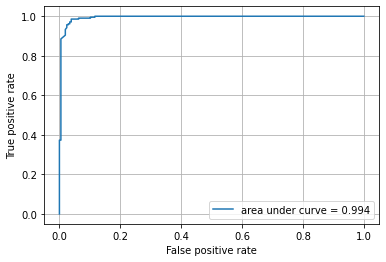

In [39]:
# plot ROC curve for svm_best
score_best = svm_best.decision_function(X_test_lsi)
fpr_best,tpr_best,_ = metrics.roc_curve(test_label,score_best)
auc_best = plot_ROC(fpr_soft,tpr_soft)
print("auc_best:%0.4f" % auc_best)

In [40]:
## evaluate this svm_best model
print("Performance of SVM soft")
print('_' * 40)
evaluation(svm_best,X_test_lsi,test_label)


Performance of SVM soft
________________________________________
Confusion matrix:
____________________
[[198   8]
 [  3 206]]
____________________
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       206
           1       0.96      0.99      0.97       209

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415



## Question 6

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic = LogisticRegression(penalty = 'none', max_iter=10000, tol=0.1)
Xtrain_logistic = X_train_lsi
ytrain_logistic = train.root_label=="sports"
logistic.fit(Xtrain_logistic, ytrain_logistic)

Xtest_logistic = X_test_lsi
ytest_logistic = test.root_label=="sports"
ytest_pred_logistic = logistic.predict(Xtest_logistic)
print(logistic.score(Xtest_logistic, ytest_logistic))
print(classification_report(ytest_logistic, ytest_pred_logistic))

0.9734939759036144
              precision    recall  f1-score   support

       False       0.99      0.96      0.97       206
        True       0.96      0.99      0.97       209

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415



In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)

    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
    return pipe

LogisticRegression(max_iter=10000, penalty='none', tol=0.1)

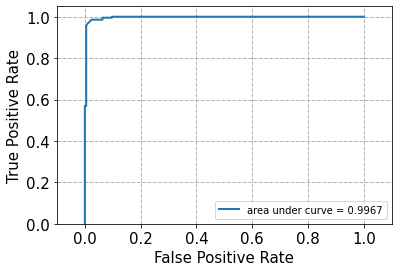

In [43]:
fit_predict_and_plot_roc(logistic, Xtrain_logistic, ytrain_logistic, Xtest_logistic, ytest_logistic)

In [44]:
# Regularization Comparision: none vs l1 vs l2

logisticNone = LogisticRegression(penalty = 'none', max_iter=10000, tol=0.1)
logisticL1 = LogisticRegression(penalty = 'l1', solver='liblinear', max_iter=10000, tol=0.1)
logisticL2 = LogisticRegression( penalty = 'l2', max_iter=10000, tol=0.1)

logisticNone.fit(Xtrain_logistic, ytrain_logistic)
logisticL1.fit(Xtrain_logistic, ytrain_logistic)
logisticL2.fit(Xtrain_logistic, ytrain_logistic)

ytest_pred_logistic_None = logisticNone.predict(Xtest_logistic)
print(logisticNone.score(Xtest_logistic, ytest_logistic))
print(classification_report(ytest_logistic, ytest_pred_logistic))

ytest_pred_logistic_L1 = logisticL1.predict(Xtest_logistic)
print(logisticL1.score(Xtest_logistic, ytest_logistic))
print(classification_report(ytest_logistic, ytest_pred_logistic))

ytest_pred_logistic_L2 = logisticL2.predict(Xtest_logistic)
print(logisticL2.score(Xtest_logistic, ytest_logistic))
print(classification_report(ytest_logistic, ytest_pred_logistic))

0.9734939759036144
              precision    recall  f1-score   support

       False       0.99      0.96      0.97       206
        True       0.96      0.99      0.97       209

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415

0.9686746987951808
              precision    recall  f1-score   support

       False       0.99      0.96      0.97       206
        True       0.96      0.99      0.97       209

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415

0.963855421686747
              precision    recall  f1-score   support

       False       0.99      0.96      0.97       206
        True       0.96      0.99      0.97       209

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg      

In [45]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

def classification_report_with_accuracy_score(y_true, y_pred):

    print (classification_report(y_true, y_pred))# print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

# 5-Fold Cross Validation with L1

cv_score_L1 = cross_val_score(logisticL1, X=Xtrain_logistic, y=ytrain_logistic, cv=5, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (cv_score_L1)

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       166
        True       0.97      0.98      0.97       166

    accuracy                           0.97       332
   macro avg       0.97      0.97      0.97       332
weighted avg       0.97      0.97      0.97       332

              precision    recall  f1-score   support

       False       0.96      0.93      0.94       166
        True       0.93      0.96      0.95       166

    accuracy                           0.95       332
   macro avg       0.95      0.95      0.95       332
weighted avg       0.95      0.95      0.95       332

              precision    recall  f1-score   support

       False       0.92      0.93      0.92       166
        True       0.93      0.92      0.92       165

    accuracy                           0.92       331
   macro avg       0.92      0.92      0.92       331
weighted avg       0.92      0.92      0.92       331

              preci

In [46]:
# 5-Fold Cross Validation with L2

cv_score_L2 = cross_val_score(logisticL2, X=Xtrain_logistic, y=ytrain_logistic, cv=5, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (cv_score_L2)

              precision    recall  f1-score   support

       False       0.98      0.96      0.97       166
        True       0.96      0.98      0.97       166

    accuracy                           0.97       332
   macro avg       0.97      0.97      0.97       332
weighted avg       0.97      0.97      0.97       332

              precision    recall  f1-score   support

       False       0.97      0.92      0.94       166
        True       0.93      0.97      0.95       166

    accuracy                           0.95       332
   macro avg       0.95      0.95      0.95       332
weighted avg       0.95      0.95      0.95       332

              precision    recall  f1-score   support

       False       0.94      0.93      0.93       166
        True       0.93      0.94      0.93       165

    accuracy                           0.93       331
   macro avg       0.93      0.93      0.93       331
weighted avg       0.93      0.93      0.93       331

              preci

# Question 7

In [47]:
from sklearn.naive_bayes import GaussianNB

naivebayes = GaussianNB()
Xtrain = X_train_lsi
ytrain = train.root_label=="sports"
logistic.fit(Xtrain, ytrain)

Xtest = X_test_lsi
ytest = test.root_label=="sports"
ytest_pred_gNB = logistic.predict(Xtest)
print(logistic.score(Xtest, ytest))
print(classification_report(ytest, ytest_pred_gNB))

0.9734939759036144
              precision    recall  f1-score   support

       False       0.99      0.96      0.97       206
        True       0.96      0.99      0.97       209

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415



## Question 8: Comparison between three classifiers

In [49]:
# prepare for pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=3, analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', SVC(kernel='linear', C=100, random_state=42))
])

pipeline.fit(train.full_text, train_label)
predict = pipeline.predict(test.full_text)
print("accuracy:{}".format(metrics.accuracy_score(test_label, predict)))

accuracy:0.9759036144578314


In [50]:
from sklearn.model_selection import GridSearchCV

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
import joblib

In [52]:
cachedir = mkdtemp()
memory = joblib.Memory(location=cachedir,verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=42)),
    ('clf', GaussianNB()),
],
memory=memory
)

param_grid = [
    {
        'vect': [
            CountVectorizer(min_df=3, stop_words='english'),
            CountVectorizer(min_df=3, analyzer=stem_rmv_punc),
            CountVectorizer(min_df=5, stop_words='english'),
            CountVectorizer(min_df=5, analyzer=stem_rmv_punc)
        ],
        'reduce_dim': [TruncatedSVD(n_components=5, random_state=42),
                       TruncatedSVD(n_components=50, random_state=42),
                       TruncatedSVD(n_components=500, random_state=42),
                       NMF(n_components=5, init='random', random_state=42),
                       NMF(n_components=50, init='random', random_state=42),
                       NMF(n_components=500, init='random', random_state=42),
                       
        ],
        'clf': [SVC(kernel='linear', C=100, random_state=42),
                LogisticRegression(penalty='l1', C=10, random_state=42),
                LogisticRegression(penalty='l2', C=100, random_state=42),
                GaussianNB()
        ],
    }
]

In [54]:
# grid search
grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(train.full_text, train_label)
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(min_df=3, stop_words='english'), 1934    A severe drought has ravaged every county in C...
1782    "Pages of history" features excerpts from The ...
1909    Weather Rain Saturday Will Help With Symptoms ...
1920    Will the serious drought conditions afflicting...
1538    A major storm system has brought heavy rain an...
                              ...                        
1638    The redesigned Ford Ranger made its debut on W...
1095    (Newser)  A family that died on a hike in Cali...
1130    --News Direct--    Pano AI , the leader in wil...
1294    EAST TAWAS, Mich.  The public is invited to a ...
860     If theres a central theme to Edgar Wrights new...
Name: full_text, Length: 1325, dtype: object, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,


________________________________________________fit_transform_one - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x11507 sparse matrix of type '<class 'numpy.int64'>'
	with 197051 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
 

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001B403529310>,
                min_df=3), 
1934    A severe drought has ravaged every county in C...
1782    "Pages of history" features excerpts from The ...
1909    Weather Rain Saturday Will Help With Symptoms ...
1920    Will the serious drought conditions afflicting...
1538    A major storm system has brought heavy rain an...
                              ...                        
1638    The redesigned Ford Ranger made its debut on W...
1095    (Newser)  A family that died on a hike in Cali...
1130    --News Direct--    Pano AI , the leader in wil...
1294    EAST TAWAS, Mich.  The public is invited to a ...
860     If theres a central theme to Edgar Wrights new...
Name: full_text, Length: 1325, dtype: object, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0

_______________________________________________fit_transform_one - 29.8s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8756 sparse matrix of type '<class 'numpy.int64'>'
	with 173962 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(min_df=5, stop_words='english'), 1934    A severe drought has ravaged every county in C...
1782    "Pages of history" features excerpts from The ...
1909    Weather Rain Saturday Will Help With Symptoms ...
1920    Will the serious drought conditions afflicting...
1538    A major storm system has brought heavy rain an...
                              ...                        
1638    The redesigned Ford Ranger made its debut on W...
1095    (Newser)  A family that died on a hike in Cali...
1130    --News Direct--    Pano AI , the leader in wil...
1294    EAST TAWAS, Mich.  The public is invited to a ...
860     If theres a central theme to Edgar Wrights new...
Name: full_text, Length: 1325, dtype: object, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,


________________________________________________fit_transform_one - 0.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x7694 sparse matrix of type '<class 'numpy.int64'>'
	with 184221 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001B403529310>,
                min_df=5), 
1934    A severe drought has ravaged every county in C...
1782    "Pages of history" features excerpts from The ...
1909    Weather Rain Saturday Will Help With Symptoms ...
1920    Will the serious drought conditions afflicting...
1538    A major storm system has brought heavy rain an...
                              ...                        
1638    The redesigned Ford Ranger made its debut on W...
1095    (Newser)  A family that died on a hike in Cali...
1130    --News Direct--    Pano AI , the leader in wil...
1294    EAST TAWAS, Mich.  The public is invited to a ...
860     If theres a central theme to Edgar Wrights new...
Name: full_text, Length: 1325, dtype: object, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0

_______________________________________________fit_transform_one - 28.1s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x5918 sparse matrix of type '<class 'numpy.int64'>'
	with 164409 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\0016ea93717d0abba90ac4e9b614e231
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\86fa401d35831bae06a631920216c3dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=50, random_state=42), <1325x11584 sparse matrix of type '<class 'numpy.float64'>'
	with 201806 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1

________________________________________________fit_transform_one - 0.1s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\8ab6e302fab0762014df39ddcf83b22c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\3d32c19928635f6346cb02e6f7d79108
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=50, random_state=42), <1325x8766 sparse matrix of type '<class 'numpy.float64'>'
	with 178368 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0

________________________________________________fit_transform_one - 0.1s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\fddc13bc1df491aa0de91e78063c8a9f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\bd53cba4045e6fb2b982162533e5c608
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=50, random_state=42), <1325x7823 sparse matrix of type '<class 'numpy.float64'>'
	with 189111 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0

________________________________________________fit_transform_one - 0.1s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\ca507f2d8db1ecc5384a1ec258c976ef
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9b5e7c62c7c179b3b88964cc5ff96d3a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=50, random_state=42), <1325x5978 sparse matrix of type '<class 'numpy.float64'>'
	with 168980 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0

________________________________________________fit_transform_one - 0.1s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\0016ea93717d0abba90ac4e9b614e231
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\86fa401d35831bae06a631920216c3dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=500, random_state=42), <1325x11584 sparse matrix of type '<class 'numpy.float64'>'
	with 201806 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
 

________________________________________________fit_transform_one - 2.4s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\8ab6e302fab0762014df39ddcf83b22c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\3d32c19928635f6346cb02e6f7d79108
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=500, random_state=42), <1325x8766 sparse matrix of type '<class 'numpy.float64'>'
	with 178368 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  

________________________________________________fit_transform_one - 3.0s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\fddc13bc1df491aa0de91e78063c8a9f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\bd53cba4045e6fb2b982162533e5c608
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=500, random_state=42), <1325x7823 sparse matrix of type '<class 'numpy.float64'>'
	with 189111 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  

________________________________________________fit_transform_one - 2.6s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\ca507f2d8db1ecc5384a1ec258c976ef
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9b5e7c62c7c179b3b88964cc5ff96d3a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=500, random_state=42), <1325x5978 sparse matrix of type '<class 'numpy.float64'>'
	with 168980 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  

________________________________________________fit_transform_one - 1.9s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\0016ea93717d0abba90ac4e9b614e231
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\86fa401d35831bae06a631920216c3dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <1325x11584 sparse matrix of type '<class 'numpy.float64'>'
	with 201806 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 1.1s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\80982e8941e3558eecea60187a5db5ef
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\11a3badf503fc55c1714455ca6ff4930
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <1326x11564 sparse matrix of type '<class 'numpy.float64'>'
	with 201668 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 0.9s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9d2fea0704d33978c3e5eaa6d090cf49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\765c52c8ea3c71bbc4656893554f62a4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <1326x11783 sparse matrix of type '<class 'numpy.float64'>'
	with 202245 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  

________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\10d27be332d7e2fdbd83e731ecab4e39
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9672787ed6aacfc83081631aece519ae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <1326x8973 sparse matrix of type '<class 'numpy.float64'>'
	with 178474 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\712c084fe864430bf0d14bba13ba9a9b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\4c6c185a0687f9238e433fabdf95b07e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <1326x7837 sparse matrix of type '<class 'numpy.float64'>'
	with 188900 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,

________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\a1b9dbdb01d76cb69423c8d85d646a3e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\7164d18a80fd70acdb2c6bb10b93ddc1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <1326x6002 sparse matrix of type '<class 'numpy.float64'>'
	with 168461 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1

_______________________________________________fit_transform_one - 13.3s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9d2fea0704d33978c3e5eaa6d090cf49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\765c52c8ea3c71bbc4656893554f62a4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=50, random_state=42), <1326x11783 sparse matrix of type '<class 'numpy.float64'>'
	with 202245 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 13.7s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\8ab6e302fab0762014df39ddcf83b22c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\3d32c19928635f6346cb02e6f7d79108
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=50, random_state=42), <1325x8766 sparse matrix of type '<class 'numpy.float64'>'
	with 178368 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 10.6s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f957a2ec0aff7c33bb445b2f460d011c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\abc1be478e0533dc68ac1b25d971f81e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=50, random_state=42), <1325x8939 sparse matrix of type '<class 'numpy.float64'>'
	with 177520 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 10.4s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\817e74b73de87c84ed65c7f29dc11ace
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f283788dc75364b3ee13a74800ef6fd9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=50, random_state=42), <1326x8838 sparse matrix of type '<class 'numpy.float64'>'
	with 178362 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 11.1s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\fddc13bc1df491aa0de91e78063c8a9f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\bd53cba4045e6fb2b982162533e5c608
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=50, random_state=42), <1325x7823 sparse matrix of type '<class 'numpy.float64'>'
	with 189111 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 10.3s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\4c1f572b54e879444e7f1555bc97ac5f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f36fa8af92e2dc36833217bbba093072
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=50, random_state=42), <1326x7694 sparse matrix of type '<class 'numpy.float64'>'
	with 184221 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 7.6s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\729a61e9227969123c0c2c7473aa1935
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\4bd43d94583c74c22ac72f348b5d9fca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=50, random_state=42), <1325x6034 sparse matrix of type '<class 'numpy.float64'>'
	with 167706 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 7.4s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\e23593a3e3a265665039a354aec2f340
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\2e86b44deb2edf22cf0aaa37269ea610
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=50, random_state=42), <1326x5918 sparse matrix of type '<class 'numpy.float64'>'
	with 164409 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 7.4s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\1134ad66c9dbf8086d5949477278759f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\735b2816ce55c4efbddb085cda3f3066
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=50, random_state=42), <1326x6014 sparse matrix of type '<class 'numpy.float64'>'
	with 168863 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 8.1s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\0016ea93717d0abba90ac4e9b614e231
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\86fa401d35831bae06a631920216c3dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1325x11584 sparse matrix of type '<class 'numpy.float64'>'
	with 201806 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,


D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 807.5s, 13.5min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\1ee7a177ae5592a02339f1daa5eeadfa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\00fa8238cba0c4754b3c00639e0b5141
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1325x11733 sparse matrix of type '<class 'numpy.float64'>'
	with 200519 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,


D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 814.1s, 13.6min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\609ed6929f7ea8b85f929d13c5aadac8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f89835bfed7ed8039689cb73ce9653d1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1326x11507 sparse matrix of type '<class 'numpy.float64'>'
	with 197051 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,


D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 802.2s, 13.4min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\80982e8941e3558eecea60187a5db5ef
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\11a3badf503fc55c1714455ca6ff4930
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1326x11564 sparse matrix of type '<class 'numpy.float64'>'
	with 201668 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,


D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 824.0s, 13.7min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9d2fea0704d33978c3e5eaa6d090cf49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\765c52c8ea3c71bbc4656893554f62a4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1326x11783 sparse matrix of type '<class 'numpy.float64'>'
	with 202245 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,


D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 826.1s, 13.8min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\8ab6e302fab0762014df39ddcf83b22c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\3d32c19928635f6346cb02e6f7d79108
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1325x8766 sparse matrix of type '<class 'numpy.float64'>'
	with 178368 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 659.8s, 11.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f957a2ec0aff7c33bb445b2f460d011c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\abc1be478e0533dc68ac1b25d971f81e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1325x8939 sparse matrix of type '<class 'numpy.float64'>'
	with 177520 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 661.4s, 11.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\dc425e386b32041a3838ba0b9b57722b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\b790201d2ff5972f0771a3f6c2944e6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1326x8756 sparse matrix of type '<class 'numpy.float64'>'
	with 173962 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 634.9s, 10.6min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\817e74b73de87c84ed65c7f29dc11ace
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f283788dc75364b3ee13a74800ef6fd9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1326x8838 sparse matrix of type '<class 'numpy.float64'>'
	with 178362 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 638.6s, 10.6min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\10d27be332d7e2fdbd83e731ecab4e39
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9672787ed6aacfc83081631aece519ae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1326x8973 sparse matrix of type '<class 'numpy.float64'>'
	with 178474 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 645.8s, 10.8min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\fddc13bc1df491aa0de91e78063c8a9f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\bd53cba4045e6fb2b982162533e5c608
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1325x7823 sparse matrix of type '<class 'numpy.float64'>'
	with 189111 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


______________________________________________fit_transform_one - 574.7s, 9.6min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\c0c15089a630bcb8ce37ba56f0b21ae8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f7c101cb5718c91c58f842e8e506b738
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1325x7810 sparse matrix of type '<class 'numpy.float64'>'
	with 187241 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


______________________________________________fit_transform_one - 569.8s, 9.5min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\db03e2251c1d009080aaee74c33e9a0a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\3e49abc0e5166b30c37f5ce8dba9dee7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1326x7826 sparse matrix of type '<class 'numpy.float64'>'
	with 189053 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


______________________________________________fit_transform_one - 578.9s, 9.6min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\ca507f2d8db1ecc5384a1ec258c976ef
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9b5e7c62c7c179b3b88964cc5ff96d3a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1325x5978 sparse matrix of type '<class 'numpy.float64'>'
	with 168980 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


______________________________________________fit_transform_one - 461.8s, 7.7min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\729a61e9227969123c0c2c7473aa1935
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\4bd43d94583c74c22ac72f348b5d9fca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1325x6034 sparse matrix of type '<class 'numpy.float64'>'
	with 167706 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


______________________________________________fit_transform_one - 470.5s, 7.8min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\1134ad66c9dbf8086d5949477278759f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\735b2816ce55c4efbddb085cda3f3066
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1326x6014 sparse matrix of type '<class 'numpy.float64'>'
	with 168863 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


______________________________________________fit_transform_one - 483.0s, 8.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\a1b9dbdb01d76cb69423c8d85d646a3e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\7164d18a80fd70acdb2c6bb10b93ddc1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=500, random_state=42), <1326x6002 sparse matrix of type '<class 'numpy.float64'>'
	with 168461 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
 

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


______________________________________________fit_transform_one - 482.2s, 8.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\0016ea93717d0abba90ac4e9b614e231
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\86fa401d35831bae06a631920216c3dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f69dd6039bbb481dba40b0cb030a3b90
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\bd53cba4045e6fb2b982162533e5c608
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\75ac2b9d237116d824c32344d409f8a7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\c0c15089a630bcb8ce37ba56f0b21ae8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f7c101cb5718c91c58f842e8e506b738
_________________________________

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f89835bfed7ed8039689cb73ce9653d1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\67775dfb1d0cc01ce46fdd7f989a5375
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\80982e8941e3558eecea60187a5db5ef
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\4c6c185a0687f9238e433fabdf95b07e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\c4a37de4d0b4867ebe2d4f448e1c0f7e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\ca507f2d8db1ecc5384a1ec258c976ef
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\abc1be478e0533dc68ac1b25d971f81e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\da1b4beb4ea1090d17c03f60c3960dab
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\dc425e386b32041a3838ba0b9b57722b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\2e86b44deb2edf22cf0aaa37269ea610
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\ab3aed3ba19663035518b3023a8e9d4f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\1134ad66c9dbf8086d5949477278759f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9672787ed6aacfc83081631aece519ae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\e9f3038df5cdffdc36cb25919784d202
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\fddc13bc1df491aa0de91e78063c8a9f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\00fa8238cba0c4754b3c00639e0b5141
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\b1d93743ef1bf18279fc3430c11fad20
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\609ed6929f7ea8b85f929d13c5aadac8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\3e49abc0e5166b30c37f5ce8dba9dee7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\7dd405035b83593bf0333737aa55d144
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\712c084fe864430bf0d14bba13ba9a9b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\3d32c19928635f6346cb02e6f7d79108
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\e26550d09d772b4f8c1b46315ec7d1d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f957a2ec0aff7c33bb445b2f460d011c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\4bd43d94583c74c22ac72f348b5d9fca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\1d9a618fbae156a2288723d8aed4d233
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\e23593a3e3a265665039a354aec2f340
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\dc425e386b32041a3838ba0b9b57722b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\b790201d2ff5972f0771a3f6c2944e6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\490a16d68dd0d32e5a4340dd3cc31459
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\817e74b73de87c84ed65c7f29dc11ace
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\1134ad66c9dbf8086d5949477278759f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\735b2816ce55c4efbddb085cda3f3066
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\a21884e106007400ecfc0f38b9792d94
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\a1b9dbdb01d76cb69423c8d85d646a3e
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\10d27be332d7e2fdbd83e731ecab4e39
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9672787ed6aacfc83081631aece519ae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\eac3e239bd62d2e6666299c4cd09aded
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\fddc13bc1df491aa0de91e78063c8a9f
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\0016ea93717d0abba90ac4e9b614e231
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\86fa401d35831bae06a631920216c3dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\27dc5e51bdd8116245aaa97cfc46afbe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\1ee7a177ae5592a02339f1daa5eeadfa
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\c0c15089a630bcb8ce37ba56f0b21ae8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f7c101cb5718c91c58f842e8e506b738
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\3e6997765226587eea62e6d26d2fa23c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\4c1f572b54e879444e7f1555bc97ac5f
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\609ed6929f7ea8b85f929d13c5aadac8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f89835bfed7ed8039689cb73ce9653d1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\780ffe7d403d14e839fa8dafc7eb4884
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\80982e8941e3558eecea60187a5db5ef
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\db03e2251c1d009080aaee74c33e9a0a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\3e49abc0e5166b30c37f5ce8dba9dee7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f113b7a550718d7dffbb57a8e0ae04eb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\712c084fe864430bf0d14bba13ba9a9b
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9d2fea0704d33978c3e5eaa6d090cf49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\765c52c8ea3c71bbc4656893554f62a4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\53f92204f98131c17c53715c44f31c22
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\8ab6e302fab0762014df39ddcf83b22c
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\ca507f2d8db1ecc5384a1ec258c976ef
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9b5e7c62c7c179b3b88964cc5ff96d3a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\71d8a8dec964c3c0d99c63716352331f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\729a61e9227969123c0c2c7473aa1935
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f957a2ec0aff7c33bb445b2f460d011c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\abc1be478e0533dc68ac1b25d971f81e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\95249de8d48bbd5f204783c68a363600
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\dc425e386b32041a3838ba0b9b57722b
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\e23593a3e3a265665039a354aec2f340
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\2e86b44deb2edf22cf0aaa37269ea610
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\6afc94cc8f736592c7080a511b4f2a35
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\1134ad66c9dbf8086d5949477278759f
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\817e74b73de87c84ed65c7f29dc11ace
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f283788dc75364b3ee13a74800ef6fd9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\02ff116c8b1c8c499749d2a285a3292a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\10d27be332d7e2fdbd83e731ecab4e39
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\a1b9dbdb01d76cb69423c8d85d646a3e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\7164d18a80fd70acdb2c6bb10b93ddc1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\66cdccd1fd9d6b024f4af7fe49bacc73
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\0016ea93717d0abba90ac4e9b614e231
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\fddc13bc1df491aa0de91e78063c8a9f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\bd53cba4045e6fb2b982162533e5c608
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\8def69123756db4b781c773c4d9da48a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\c0c15089a630bcb8ce37ba56f0b21ae8
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\1ee7a177ae5592a02339f1daa5eeadfa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\00fa8238cba0c4754b3c00639e0b5141
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f4d9f84ee7fa9648e5d028dbee9fcf2f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\609ed6929f7ea8b85f929d13c5aadac8
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\4c1f572b54e879444e7f1555bc97ac5f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f36fa8af92e2dc36833217bbba093072
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f48b578bd90c23ef2a75eb221c36c167
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\db03e2251c1d009080aaee74c33e9a0a
_________________________________

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\11a3badf503fc55c1714455ca6ff4930
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\c85e09f9c40d56a67c48c070529ac59e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\9d2fea0704d33978c3e5eaa6d090cf49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\712c084fe864430bf0d14bba13ba9a9b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\4c6c185a0687f9238e433fabdf95b07e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\33da7a0a3511687bd970abe24568435c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\ca507f2d8db1ecc5384a1ec258c976ef
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\8ab6e302fab0762014df39ddcf83b22c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\3d32c19928635f6346cb02e6f7d79108
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\cbcaac03f4854b454a0bc38634ef4550
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\f957a2ec0aff7c33bb445b2f460d011c
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\729a61e9227969123c0c2c7473aa1935
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\4bd43d94583c74c22ac72f348b5d9fca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\48be58ee871c63653a0d0cad2d44542e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\e23593a3e3a265665039a354aec2f340
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\dc425e386b32041a3838ba0b9b57722b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\b790201d2ff5972f0771a3f6c2944e6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\2a74deba6d31734c39ed425c9302fe47
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\817e74b73de87c84ed65c7f29dc11ace
_________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\1134ad66c9dbf8086d5949477278759f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\735b2816ce55c4efbddb085cda3f3066
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\8cf50ca78964a6dfb0d88d2fe48994c2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\LENOVO\AppData\Local\Temp\tmp5a_0xipz\joblib\sklearn\pipeline\_fit_transform_one\a1b9dbdb01d76cb69423c8d85d646a3e
_________________________________

D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\ProgramData\Anaconda3\envs\myCourse\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(min_df=5, stop_words='english'), 1431    More than 1 million Washingtonians participate...
1567    A 4.7-magnitude earthquake rattled northwest S...
1044    More campgrounds are coming to the Auburn Stat...
175     Retro gamers will be able to relive all the jo...
1610    SAN SIMEON, Calif. (KGTV)  An earthquake with ...
                              ...                        
1638    The redesigned Ford Ranger made its debut on W...
1095    (Newser)  A family that died on a hike in Cali...
1130    --News Direct--    Pano AI , the leader in wil...
1294    EAST TAWAS, Mich.  The public is invited to a ...
860     If theres a central theme to Edgar Wrights new...
Name: full_text, Length: 1657, dtype: object, 
[ 0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,


In [55]:
import pandas as pd

result = pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.890214,0.016934,0.119382,0.012400,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)","CountVectorizer(min_df=3, stop_words='english')","{'clf': SVC(C=100, kernel='linear', random_sta...",0.939759,0.915663,0.921450,0.939577,0.903323,0.923954,0.014103,46
1,28.847751,0.916071,7.201628,0.348592,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=100, kernel='linear', random_sta...",0.936747,0.915663,0.894260,0.936556,0.897281,0.916101,0.018309,60
2,0.806911,0.013631,0.116953,0.009206,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)","CountVectorizer(min_df=5, stop_words='english')","{'clf': SVC(C=100, kernel='linear', random_sta...",0.942771,0.918675,0.921450,0.936556,0.903323,0.924555,0.013935,45
3,28.343112,0.443759,7.396043,0.824464,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=100, kernel='linear', random_sta...",0.933735,0.918675,0.900302,0.939577,0.891239,0.916705,0.018626,58
4,0.408963,0.016459,0.118535,0.007790,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=50, random_state=42)","CountVectorizer(min_df=3, stop_words='english')","{'clf': SVC(C=100, kernel='linear', random_sta...",0.960843,0.954819,0.942598,0.957704,0.960725,0.955338,0.006745,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.133156,0.008734,7.114854,0.214618,GaussianNB(),"NMF(init='random', n_components=50, random_sta...",CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.966867,0.960843,0.966767,0.966767,0.954683,0.963186,0.004837,15
92,0.159981,0.005195,2.327658,0.059513,GaussianNB(),"NMF(init='random', n_components=500, random_st...","CountVectorizer(min_df=3, stop_words='english')","{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.966867,0.975904,0.948640,0.966767,0.960725,0.963781,0.008989,13
93,0.137558,0.004938,9.106821,0.491132,GaussianNB(),"NMF(init='random', n_components=500, random_st...",CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.966867,0.978916,0.930514,0.966767,0.951662,0.958945,0.016638,22
94,0.153181,0.011368,2.145601,0.072860,GaussianNB(),"NMF(init='random', n_components=500, random_st...","CountVectorizer(min_df=5, stop_words='english')","{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.972892,0.972892,0.945619,0.978852,0.966767,0.967404,0.011543,4


In [57]:
# save the data
np.save("results",result)

In [66]:
best_list = {}
k = 1
for i,row in enumerate(result['rank_test_score']):
    if row >= 1 and row <= 5:
        best_list[row] = i
    
print("The index of 5 best combination:{}".format(best_list))

The index of 5 best combination:{3: 8, 5: 20, 2: 56, 1: 58, 4: 94}


In [69]:
i = 1
while i <= 5:
    index = best_list[i]
    print("_" * 80)
    print("rank_test_score:")
    print(result['rank_test_score'][index]) 
    print("_" * 20)
    print("mean_test_score:")
    print(result['mean_test_score'][index])     
    print("_" * 20)
    print("model parameters:")
    print(result['params'][index])  
    print("_" * 80)
    i += 1

________________________________________________________________________________
rank_test_score:
1
____________________
mean_test_score:
0.9698121792305173
____________________
model parameters:
{'clf': LogisticRegression(C=10, random_state=42), 'reduce_dim': TruncatedSVD(n_components=500, random_state=42), 'vect': CountVectorizer(min_df=5, stop_words='english')}
________________________________________________________________________________
________________________________________________________________________________
rank_test_score:
2
____________________
mean_test_score:
0.969209769591963
____________________
model parameters:
{'clf': LogisticRegression(C=10, random_state=42), 'reduce_dim': TruncatedSVD(n_components=500, random_state=42), 'vect': CountVectorizer(min_df=3, stop_words='english')}
________________________________________________________________________________
________________________________________________________________________________
rank_test_score:
3
_____